# Dominik Szot
Laboratorium 09 <br>
Równania różniczkowe zwyczajne

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate
import matplotlib.ticker
import sympy
from scipy.optimize import fsolve
import collections
import itertools

<b>Zadanie 1</b> <br>
Przedstaw każde z poniższych równań różniczkowych zwyczajnych
jako równoważny układ równań pierwszego rzędu (ang. first-order system of
ODEs):

* <b>równanie Van der Pol'a: </b> <br>
$ y'' = y'(1-y^2) - y $ <br>

$$
\left\{
\begin{matrix}
y_{1} = y' 
\\
y_{1}' = y_{1}(1-y^2) - y
\end{matrix}\right.
$$

* <b>równanie Blasiusa: </b> <br>
$ y''' = -yy'' $ <br>

$$
\left\{\begin{matrix}
 y_1 = y \\
 y_2 = y_1' \\
 y_3' = -y_1y_2'
\end{matrix}\right.
$$

* <b>II zasada dynamiki Newtona dla problemu dwóch ciał:</b> <br>
$ y_1'' = -GM_{y1}/(y_{1}^2 + y_{2}^2)^{3/2} $ <br>
$ y_2'' = -GM_{y2}/(y_{1}^2 + y_{2}^2)^{3/2} $ <br>

$$
\left\{\begin{matrix}
 y_3 = y_1' \\
 y_4 = y_2' \\
 y_3' = -GMy_1/(y_1^2 + y_2^2)^{3/2} \\
 y_4' = -GMy_2/(y_1^2 + y_2^2)^{3/2}
\end{matrix}\right.
$$

<b>Zadanie 2.</b> Dane jest równanie różniczkowe zwyczajne 
$ y_1 = -5y $
z warunkiem początkowym $ y(0) = 1 $. Równanie rozwiązujemy numerycznie z
krokiem $ h = 0.5 $

* <b> Czy rozwiązania powyższego równania są stabilne? </b> <br>
<b> Stabilność w sensie Lapundowa </b> <br>

&emsp;&emsp; Rozwiązanie $ y(t) $ jest stabilne w sensie Lapunowa, jeśli dla dowolnego  $ \epsilon > 0 $ istnieje $ \delta > 0 $, że każde <br>
&emsp;&emsp; rozwiązanie $ x(t) $ tego równania, gdy warunki początkowe spełniają nierówność

$$ || x(t_0) - y(t_0) ||  < \delta $$
&emsp;&emsp; to 
$$ ||x(t) - y(t)|| < \epsilon , t \ge t_0 $$

&emsp;&emsp;<br><br>&emsp;&emsp; Równanie o zmiennych rozdzielonych, którego rozwiązaniem jest 
$$ y(t)=e^{-5t} $$


&emsp;&emsp;Dla dowolnego $ \epsilon > 0 $ szukamy $ \delta > 0 $, że prawdziwa będzie implikacja 
$$ | 1 - 0 | < \delta => |e^{-5t} - 0| < \epsilon $$

$$ 1 < \delta => |e^{-5t} - 0| < \epsilon $$
&emsp;&emsp;Ponieważ, <br>
$$ 1 \ge e^{-5t} , t \ge 0$$ 
&emsp;&emsp;więc dla $ \epsilon = \delta $ implikacja jest prawdziwa => rozwiązanie jest stabilne w sensie Lapundowa.


* <b> Czy metoda Euler'a jest stabilna dla tego równania z użytym krokiem h? </b><br>
$$ 
Algorytm:\\
u^{n+1} = u^n - f(u^n,t^n)\cdot \Delta t \\$$ 

&emsp;&emsp;Rejon bezwzględnej stabilności: 

$$ 
|{1 - \Delta t \cdot \lambda } | \le 1
$$

$$ 
|1 - 0.5 \cdot (-5)| \nless 1
$$

&emsp;&emsp;Warunek nie jest spełniony, więc metoda nie jest stabilna dla tego równania z użytym krokiem h



* <b> Oblicz numerycznie wartości przybliżonego rozwiązania dla t = 0.5 metodą
Euler’a.</b><br>


In [2]:
f_01 = lambda y, t : -5*y
f_01_actual = lambda t : np.e**(-5*t)

def euler_method(y_0, x_0, h, t, f):
    y = y_0
    for _ in range(int(t//h)):
        y = y + h * f(y, t)

    return y

print(f"Numeryczna wartość obliczona metodą Euler'a: {euler_method(1,0, 0.5, 0.5, f_01)}")
print(f"Wartość prawidłowa: {f_01_actual(0.5)}")


Numeryczna wartość obliczona metodą Euler'a: -1.5
Wartość prawidłowa: 0.0820849986238988


* <b> Wyjaśnij, czy niejawna metoda Euler’a jest stabilna dla tego równania z
użytym krokiem h?
</b><br>


$$ 
Algorytm:\\
u^{n} = u^{n-1} + f(u^n,t^n) \cdot {\Delta t}   $$ 

&emsp;&emsp;Rejon bezwzględnej stabilności: 

$$ 
| \frac {1} {1 - \Delta t \cdot \lambda } | \le 1
$$


$$ 
| \frac {1} {1 - 0.5 \cdot (-5)}| < 1
$$

&emsp;&emsp;Warunek jest spełniony, więc wyniki pozostaną skończone dla $ n \mapsto \infty  $

In [3]:
f_01 = lambda y, t : -5*y
f_01_actual = lambda t : np.e**(-5*t)

def euler_method_implicit(y_0, x_0, h, t, f):
    y = y_0
    for _ in range(int(t//h)):
        y = y/(1 - f(y, t)*h)

    return y

print(f"Numeryczna wartość obliczona metodą Euler'a: {euler_method_implicit(1, 0, 0.5, 0.5, f_01)}")
print(f"Wartość prawidłowa: {f_01_actual(0.5)}")


Numeryczna wartość obliczona metodą Euler'a: 0.2857142857142857
Wartość prawidłowa: 0.0820849986238988


<b>Zadanie 3.</b> Rozwiąż układ równań  <br>
$$ x'' = - GMx/r^3  $$ 
$$ y'' = - GMy/r^3  $$
dla $ GM = 1 $, $ r = (x^2 + y^2)^{1/2} $

* <b> używająć jawnej metody Eulera </b><br>
$$ y_{k+1} = y_k + h_kf'(t_k, y_k) $$


In [4]:
# Simulation settings 

r_0 = [1, 0] # Position vector
v_0 = [0, 1] # Velocity vector

simulation_time = (0,5*np.pi)

initial_values = [r_0[0], r_0[1], v_0[0], v_0[1]]

simulation = {
    1: [initial_values, 0.01],
    2: [initial_values, 0.005],
    3: [initial_values, 0.001],
    4: [initial_values, 0.0001],
}

labels = {
    "x_position" : "x(t)", 
    "y_position" : "y(t)", 
    "x_velocity" : "v_x",
    "y_velocity" : "x_y", 
    "radius"     : "r",
    "velocity"   : "v",
    "energy"     : "E(x)", 
    "momentum"   : "L(x)",
    "time"       : "t"
}

titles = {
    1: "Wykres fazowy funkcji x(t) w funkcji y(t)",
    2: "Wykres funkcji x(t) w funkcji czasu", 
    3: "Wykres funkcji y(t) w funkcji czasu", 
    4: "Zależność prędkośći od promienia", 
    5: "Zależność energi od czasu",
    6: "Zależność pędu od czasu"
}

<b> Metoda Eulera pierwszego rzędu </b> <br>
Alorytm:
$$ 
    u^{n+1} = u^n - f(u^n, t^n) \Delta t 
$$

* Metoda jawna 
* 1-go rzędu - błąd zmienia liniowo się ze względu na $ \Delta t : \epsilon = 0(\Delta t) $
* prosta 
* efetywna

<br>

w czasie $ t^n $ mamy $ u^n $ z błędem $ \epsilon ^ n $ <br>
w czasie $ t^{n+1} $ mamy $ u^{n+1}  $ z błędem $ \epsilon ^ {n+1}  $ <br>

<br>

Współczynnik wzmocnienia: 

$$
    g = \frac {\epsilon ^ {n+1}} {\epsilon ^ n} = 1 - \frac {\partial f} {\partial u} |_n \Delta t
$$

warunek stabilności : $ |g| \le 1 $ <br>
warunek stabliności dla $ \frac {\partial f } {\partial u} > 0 $ : 

$$ 
    \frac {\partial f} {\partial u} |_n \Delta t \le 2 \rightarrow \Delta t \le \frac {2} {\frac {\partial f} {\partial u} |_n} \Rightarrow \ krok
$$

Gdy $ \frac {\partial f } {\partial u} < 0 $ metoda niestabilna

In [5]:
def plotter(plt, result_array, x_axis, y_axis, plot_configuration, title):
    act = 0
    for i in list(itertools.product([0, 1], repeat=2)):
        plt[i[0], i[1]].scatter(result_array[act][x_axis],result_array[act][y_axis], label = "dt " + str(simulation[act+1][1]), s=1)
        plt[i[0], i[1]].set_title(titles[title], fontdict=plot_configuration)
        plt[i[0], i[1]].set_xlabel(f"{labels[x_axis]}", fontdict=plot_configuration)
        plt[i[0], i[1]].set_ylabel(f"{labels[y_axis]}", fontdict=plot_configuration)
        plt[i[0], i[1]].legend(loc='upper left')
        act += 1
        
def plotter_helper(results, x_axis, y_axis, filename, title):
    
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
    
    fig, axs = plt.subplots(2, 2)
    fig.set_figwidth(11)
    fig.set_figheight(9)

    fig.subplots_adjust(left=0.1, bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.3)
    
    plotter(axs, results, x_axis, y_axis, font, title)
    # for ax in fig.get_axes():
    #     ax.label_outer()
    # fig.savefig(filename, dpi=600)

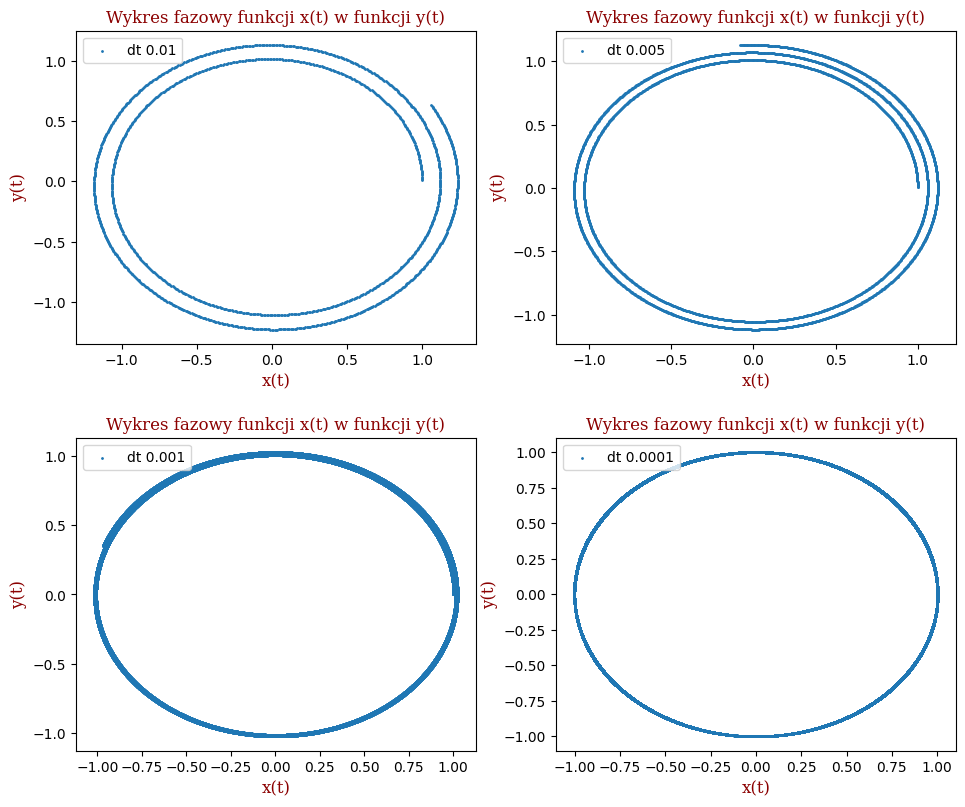

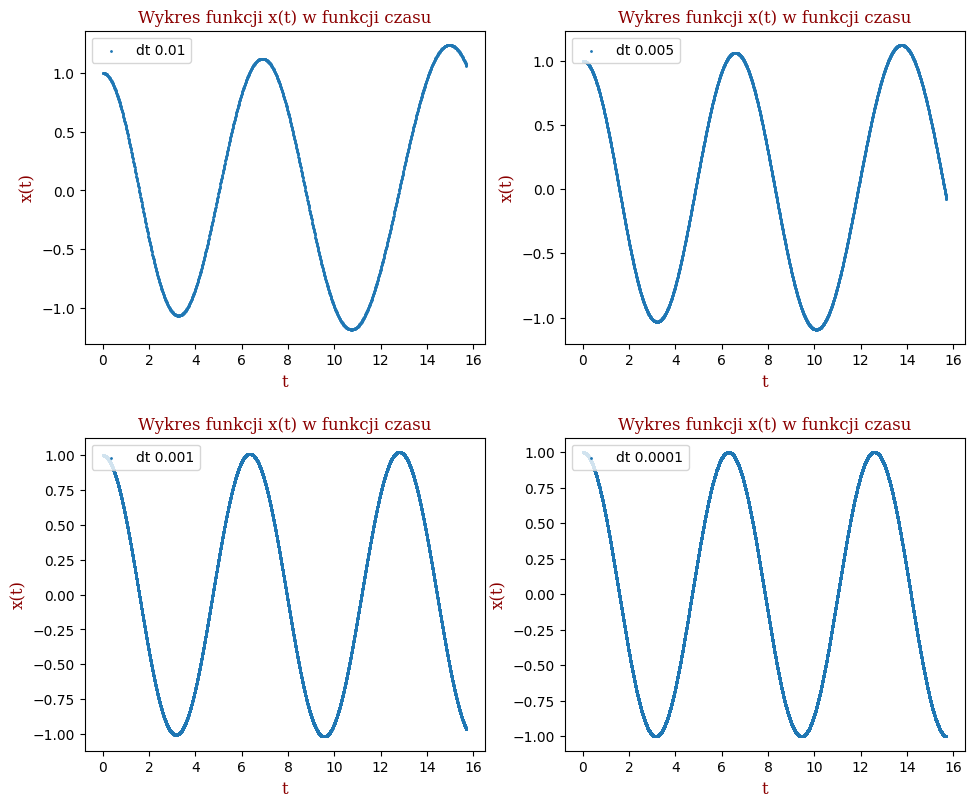

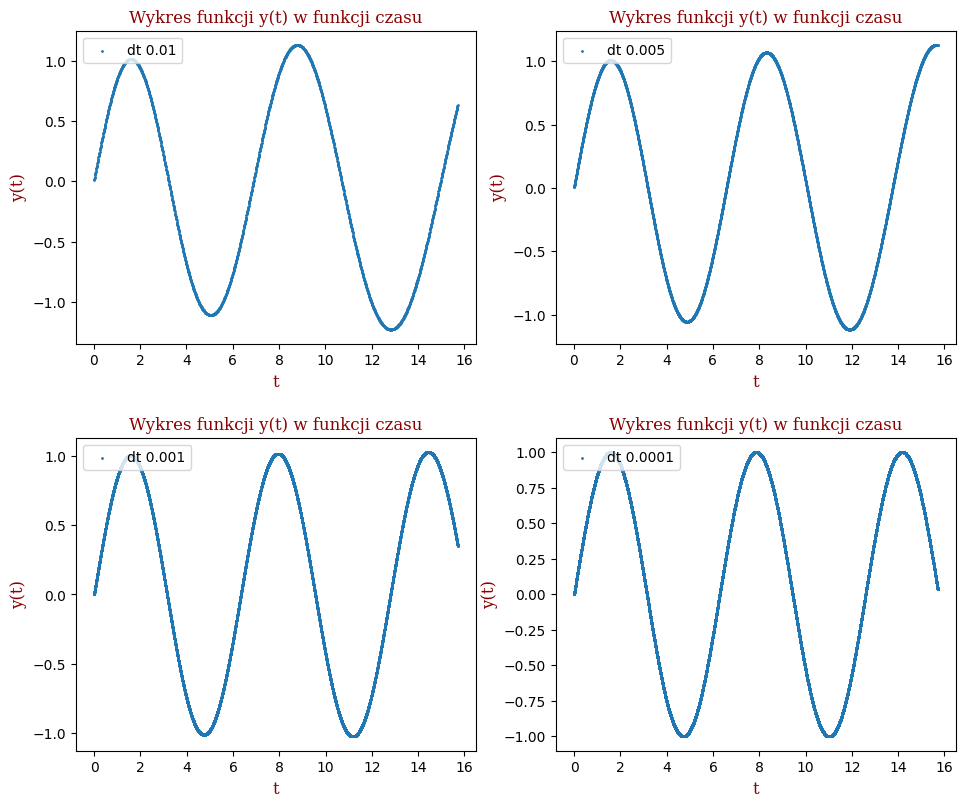

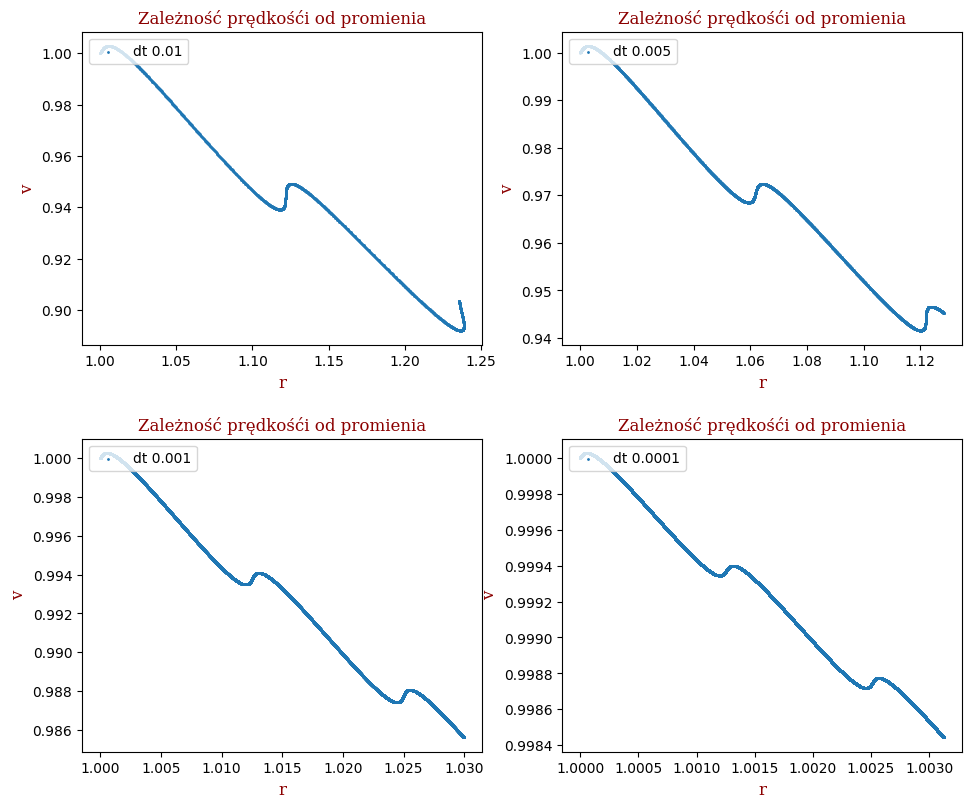

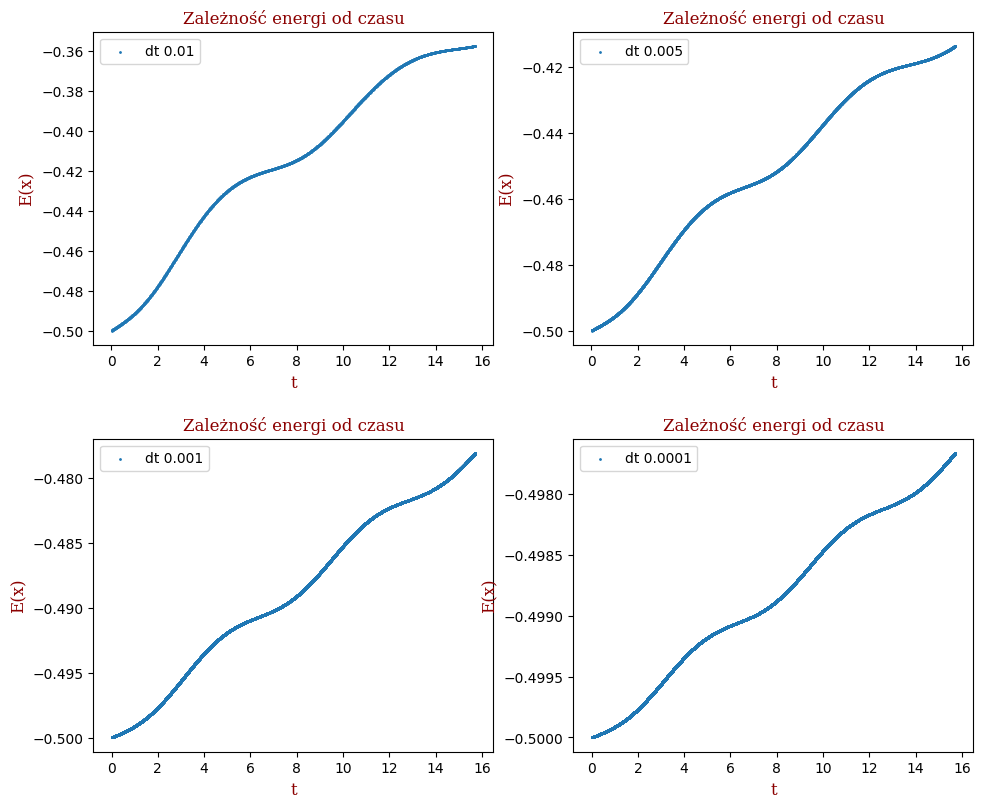

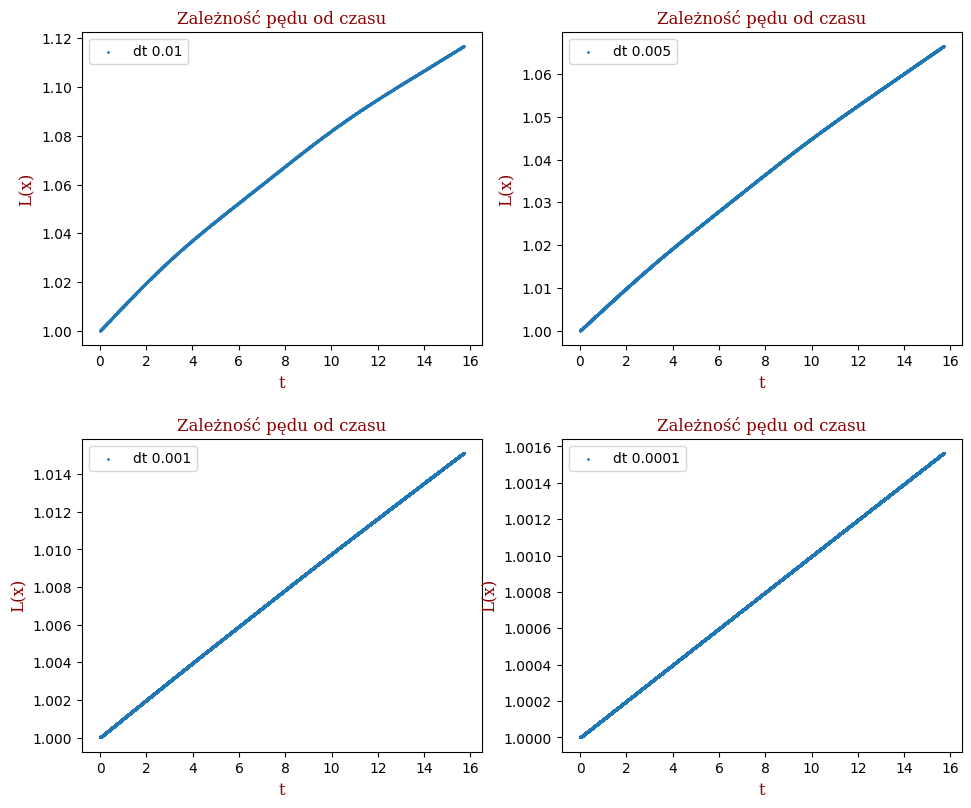

In [6]:
# Forward Euler Method
def euler_method(initial_values, dt, steps):

    t0, t1 = steps
    uvals = []
    tvals = []
    u = initial_values

    def calculate_step(u):
        norm =  np.linalg.norm(u[0:2]) ** 3
        return np.array([u[2], u[3], -u[0]/norm, -u[1]/norm])
    
    while t0 < t1:
        u += calculate_step(u) * dt
        uvals.append(u.copy())

        t0 += dt
        tvals.append(t0)

    return np.array(uvals), tvals

results = {}

for i in range(4):
    u, t = euler_method(simulation[i+1][0], simulation[i+1][1], simulation_time)

    x, y, x_velocity, y_velocity = np.array_split(u, 4, axis=1)
    r = np.sqrt(x**2 + y**2)                       
    vel =  np.sqrt(x_velocity**2 + y_velocity**2) 
    energy = vel/2 - 1/r  
    momentum = x*y_velocity - y*x_velocity

    results[i] = {
        "x_position" : x, 
        "y_position" : y, 
        "x_velocity" : x_velocity,
        "y_velocity" : y_velocity, 
        "radius"     : r,
        "velocity"   : vel,
        "energy"     : energy, 
        "momentum"   : momentum,
        "time"       : t
    }

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

plotter_helper(results, "x_position", "y_position", "euler_method_plot_01", 1)
plotter_helper(results, "time", "x_position","euler_method_plot_02", 2)
plotter_helper(results, "time", "y_position",  "euler_method_plot_03", 3)
plotter_helper(results, "radius", "velocity",  "euler_method_plot_04", 4)
plotter_helper(results, "time", "energy", "euler_method_plot_05", 5)
plotter_helper(results, "time", "momentum", "euler_method_plot_06", 6)

Niejawna metoda Eulera wykorzystuje przybliżone wartości rozwiązania w kolejnych punktach czasowych. <br>

$$ u^{n} = u^{n-1} + f(u^n,t^n) \cdot {\Delta t}   $$ 


$$
    g = \frac {1} {1 - \Delta t }
$$


W celu rozwiązania powyższego równania musimy użyć technik iteracyjnych lub numerycznych metod rozwiązywania równań nieliniowych <br>

Współczynnik wzmocnienia metody niejawnej Eulera ma postać Q(xt) = 1/(1 - xt). <br>
Metoda ta, w porównaniu to jawnej, wydaje się być zdecydowanie bardziej złożona i kosztowna przez konieczność rozwiązywania równań nieliniowych.
Zaletą będzie lepsza stabilność

In [7]:
# Backward Euler Method

def euler_implicit(initial_values, dt, steps):

    t0, t1 = steps
    uvals = []
    tvals = []
    u = initial_values
    
    def step_function(values,next_values,dt):
        x,y,x_velocity,y_velocity = values
        x_next, y_next, x_velocity_next, y_velocity_next = next_values

        norm = np.linalg.norm(next_values[0:2])

        return [
            x - x_next - dt * x_velocity,
            y - y_next - dt * y_velocity,
            x_velocity - x_velocity_next + dt * x/(norm**3),
            y_velocity - y_velocity_next + dt * y/(norm**3),
        ]

    while t0 < t1:
        u_tmp = u.copy()
        u = fsolve(step_function, u, args=(u_tmp, dt))
        uvals.append(u.copy())
        t0 += dt
        tvals.append(t0)

    return np.array(uvals), tvals


results = {}

for i in range(4):
    u, t = euler_implicit(simulation[i+1][0], simulation[i+1][1], simulation_time)

    x, y, x_velocity, y_velocity = np.array_split(u, 4, axis=1)
    r = np.sqrt(x**2 + y**2)                       
    vel =  np.sqrt(x_velocity**2 + y_velocity**2) 
    energy = vel/2 - 1/r  
    momentum = x*y_velocity - y*x_velocity

    results[i] = {
        "x_position" : x, 
        "y_position" : y, 
        "x_velocity" : x_velocity,
        "y_velocity" : y_velocity, 
        "radius"     : r,
        "velocity"   : vel,
        "energy"     : energy, 
        "momentum"   : momentum,
        "time"       : t
    }

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

plotter_helper(results, "x_position", "y_position", "euler_implicit_plot_01", 1)
plotter_helper(results, "time", "x_position", "euler_implicit_plot_02", 2)
plotter_helper(results, "time", "y_position",  "euler_implicit_plot_03", 3)
plotter_helper(results, "radius", "velocity",  "euler_implicit_plot_04", 4)
plotter_helper(results, "time", "energy", "euler_implicit_plot_05", 5)
plotter_helper(results, "time", "momentum", "euler_implicit_plot_06", 6)

/home/dominiq/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Metoda półjawna łączy cechy metody jawnej i niejawnej. Zapewnia zdecydowanie lepszą stabilność i dokładność w porównaniu do metody jawnej kosztem większego kosztu obliczeniowego. <br>

Współczynnik wzmocnienia metody: Q(xt) = (1+0.5*x*t)/(1-0.5*x*t)

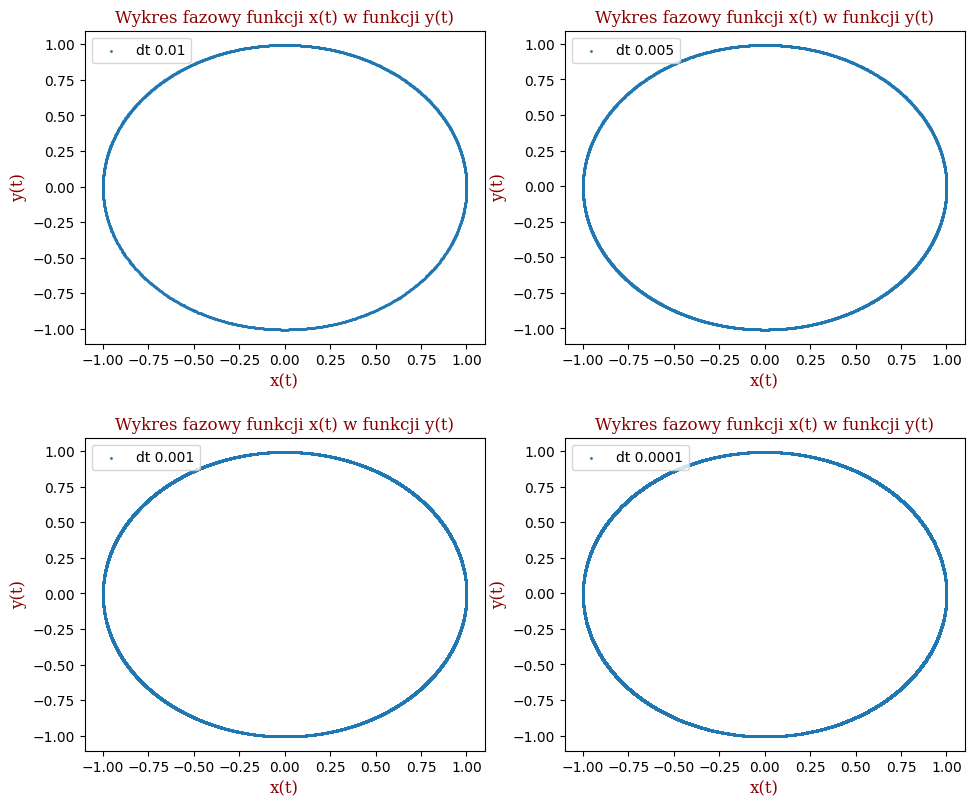

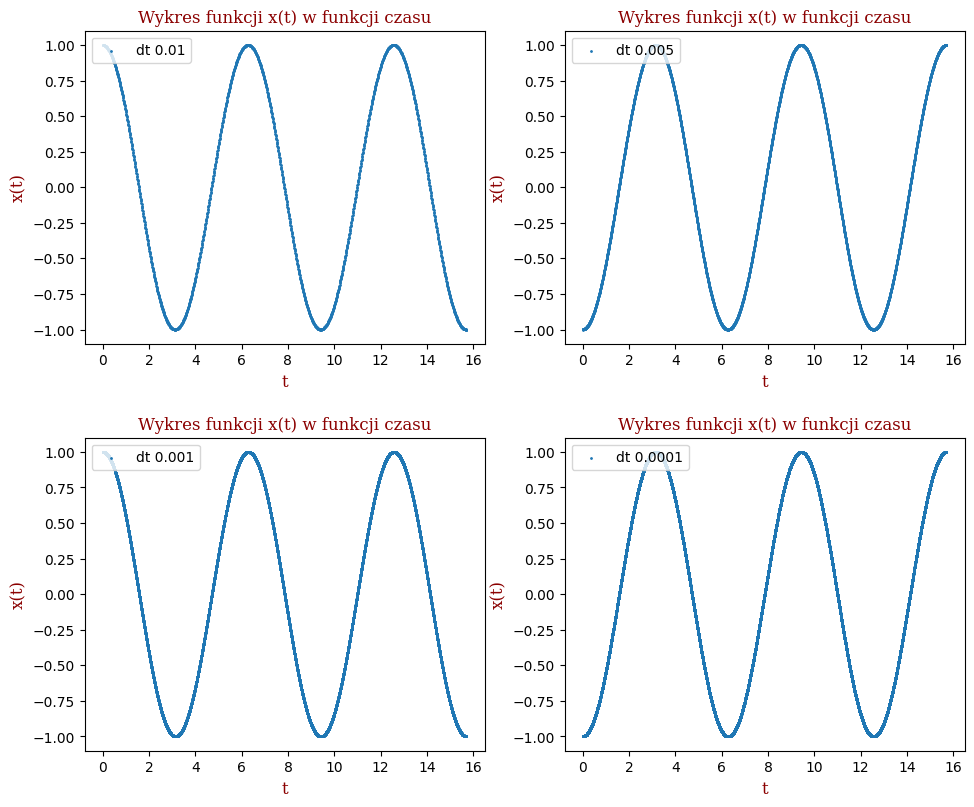

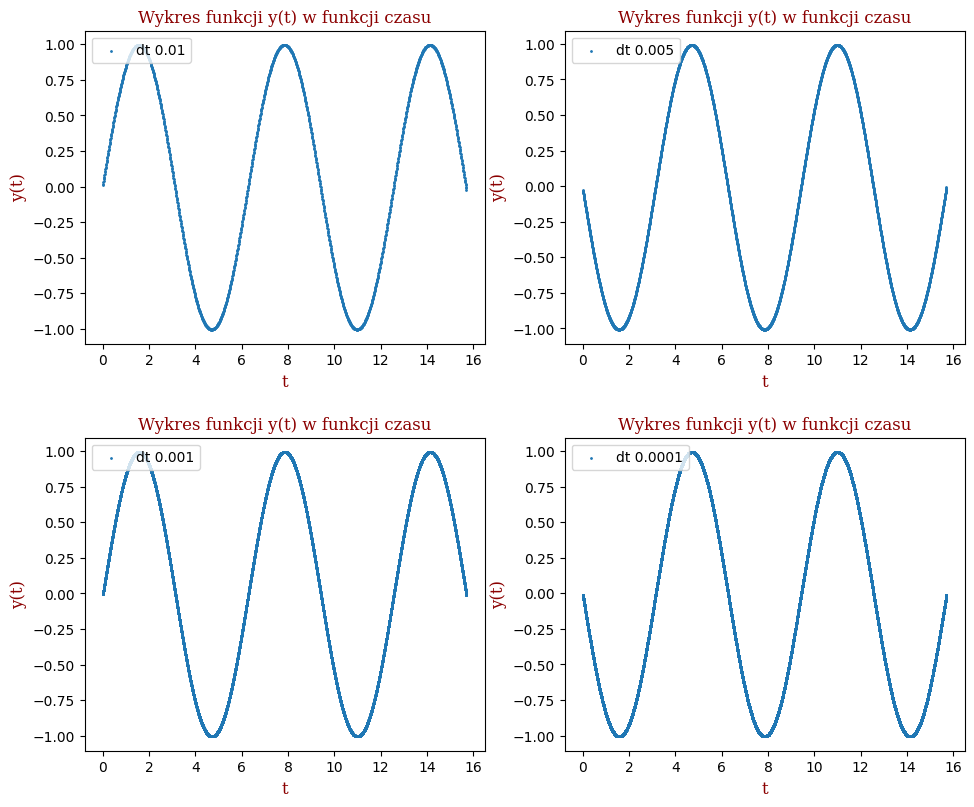

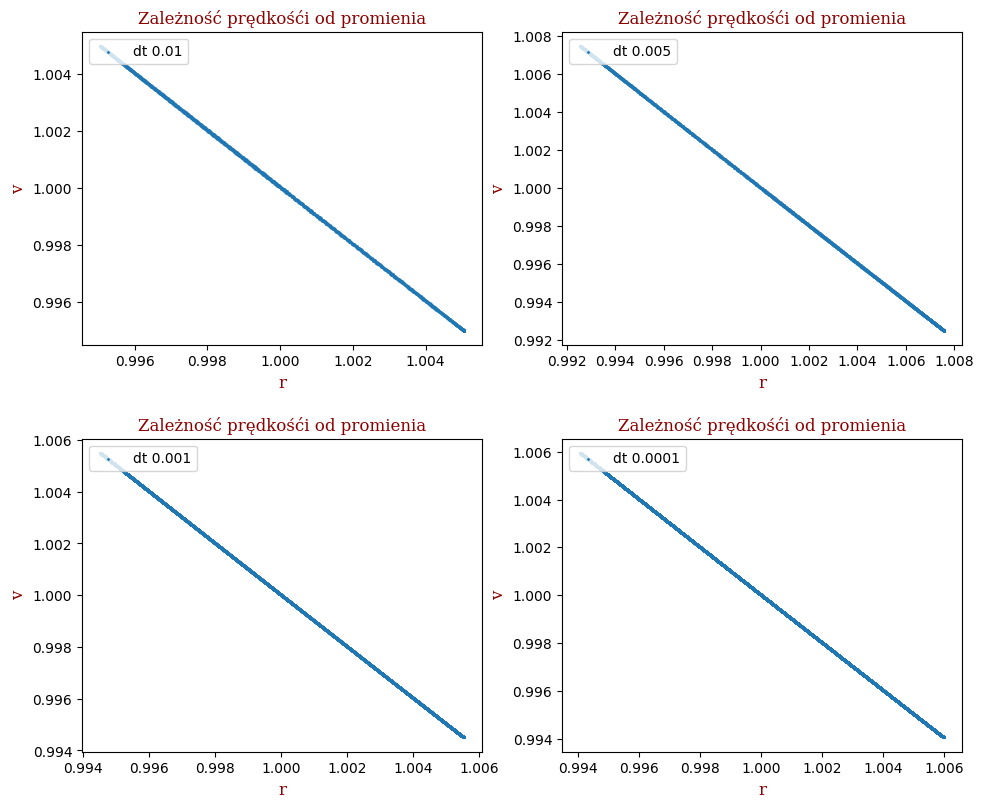

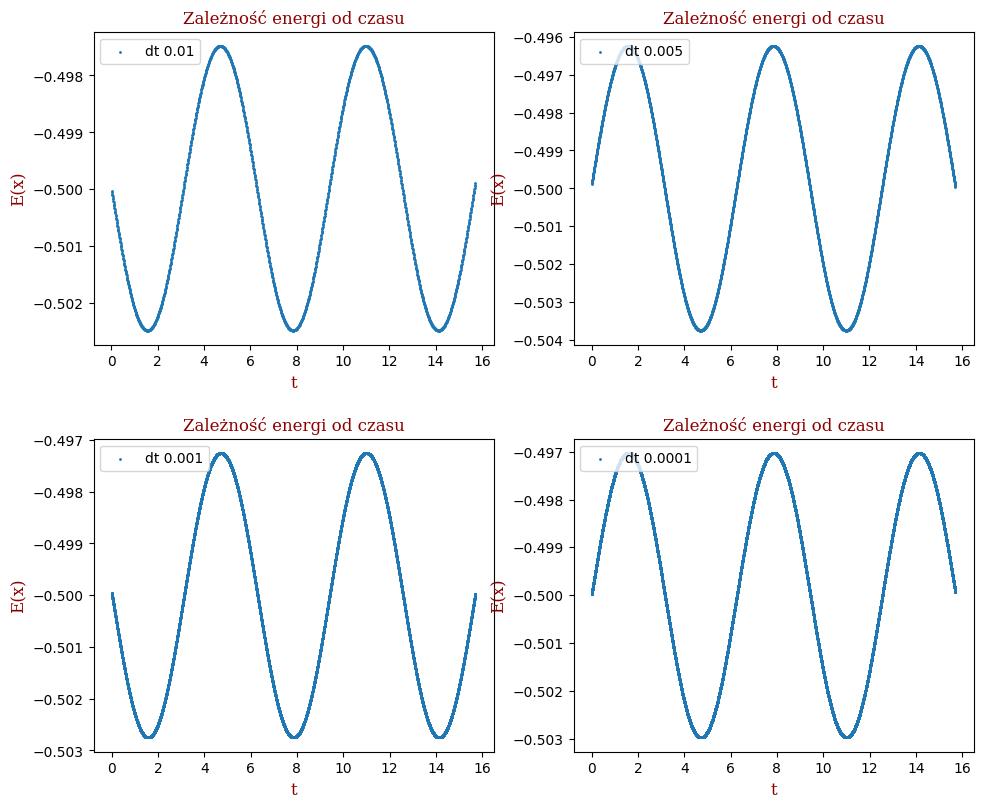

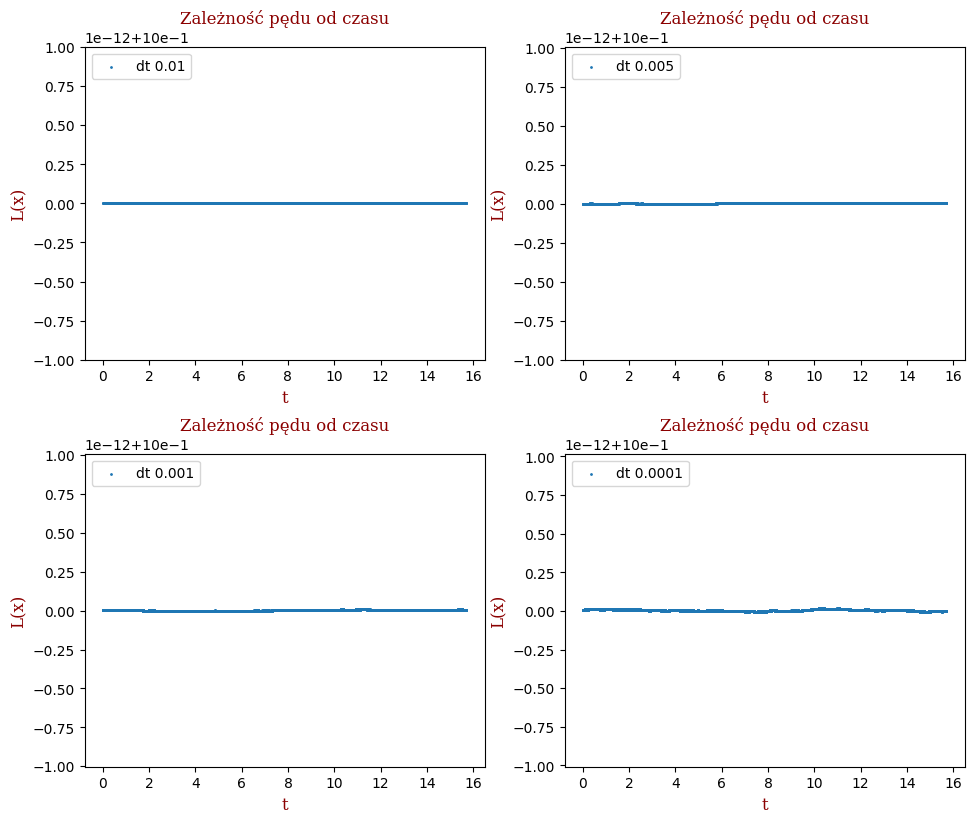

In [ ]:
def euler_semi_implicit(initial_values, dt, steps):

    t0, t1 = steps
    uvals = []
    tvals = []
    u = initial_values
    
    while t0 < t1:
        r = np.linalg.norm([u[0:2]])

        u[2] -= dt*u[0]/r**3
        u[3] -= dt*u[1]/r**3
        u[0] += dt*u[2]
        u[1] += dt*u[3]
        
        uvals.append(u.copy())
        t0 += dt
        tvals.append(t0)

    return np.array(uvals), tvals

results = {}

for i in range(4):
    u, t = euler_semi_implicit(simulation[i+1][0], simulation[i+1][1], simulation_time)

    x, y, x_velocity, y_velocity = np.array_split(u, 4, axis=1)
    r = np.sqrt(x**2 + y**2)                       
    vel =  np.sqrt(x_velocity**2 + y_velocity**2) 
    energy = vel/2 - 1/r  
    momentum = x*y_velocity - y*x_velocity

    results[i] = {
        "x_position" : x, 
        "y_position" : y, 
        "x_velocity" : x_velocity,
        "y_velocity" : y_velocity, 
        "radius"     : r,
        "velocity"   : vel,
        "energy"     : energy, 
        "momentum"   : momentum,
        "time"       : t
    }

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

plotter_helper(results, "x_position", "y_position", "euler_semi_implicit_plot_01", 1)
plotter_helper(results, "time", "x_position", "euler_semi_implicit_plot_02", 2)
plotter_helper(results, "time", "y_position",  "euler_semi_implicit_plot_03", 3)
plotter_helper(results, "radius", "velocity",  "euler_semi_implicit_plot_04", 4)
plotter_helper(results, "time", "energy", "euler_semi_implicit_plot_05", 5)
plotter_helper(results, "time", "momentum", "euler_semi_implicit_plot_06",6 )

Metoda Rungego-Kutty polega na wykorzystaniu wielu przybliżeń pochodnych w celu uzyskania dokładnego rozwiązania. 

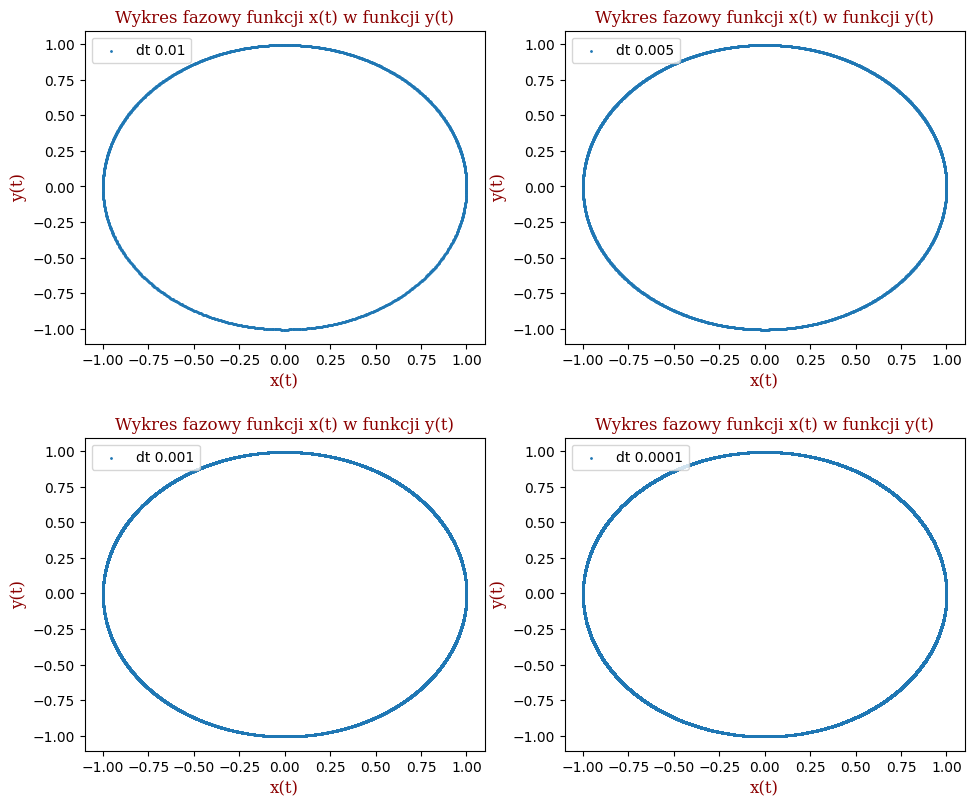

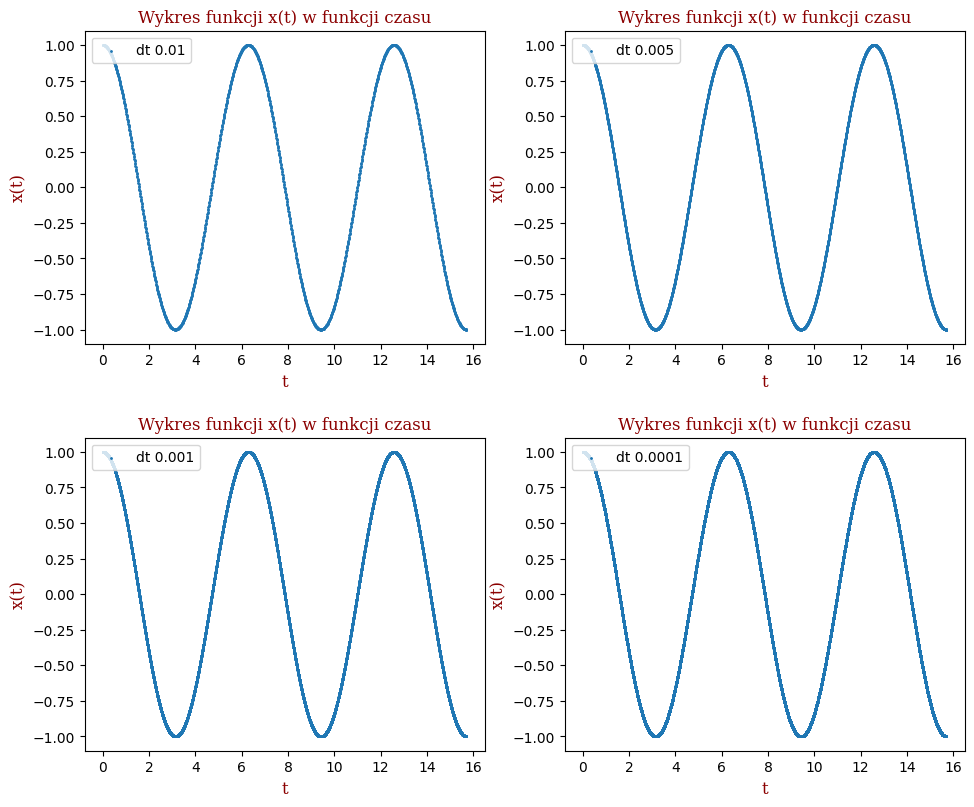

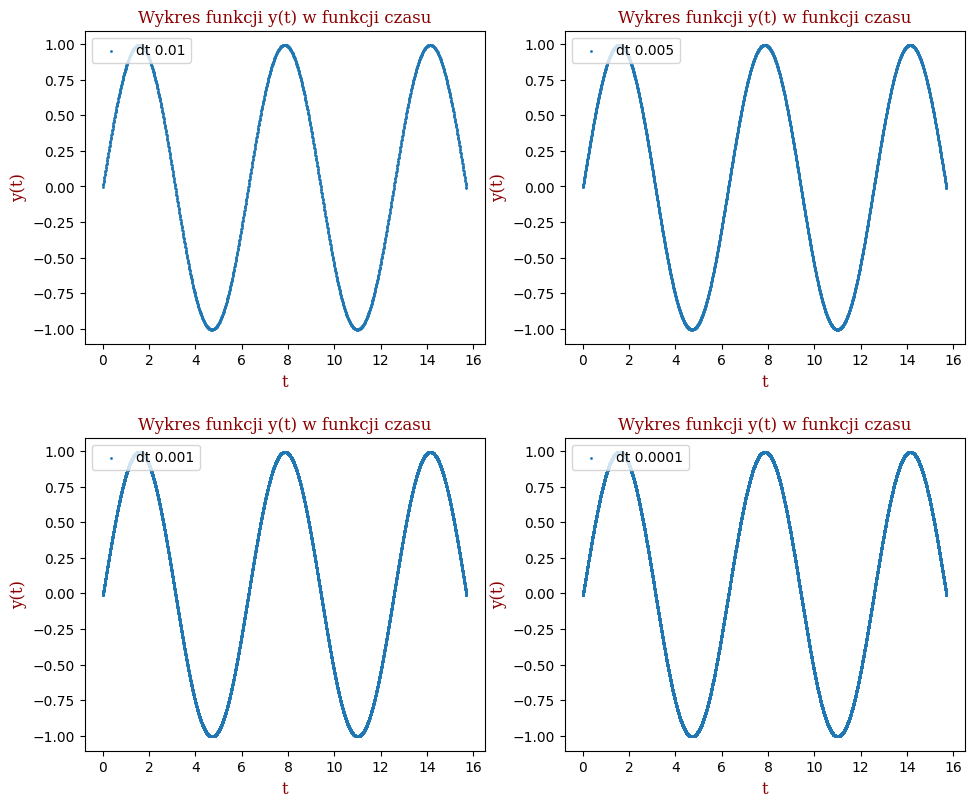

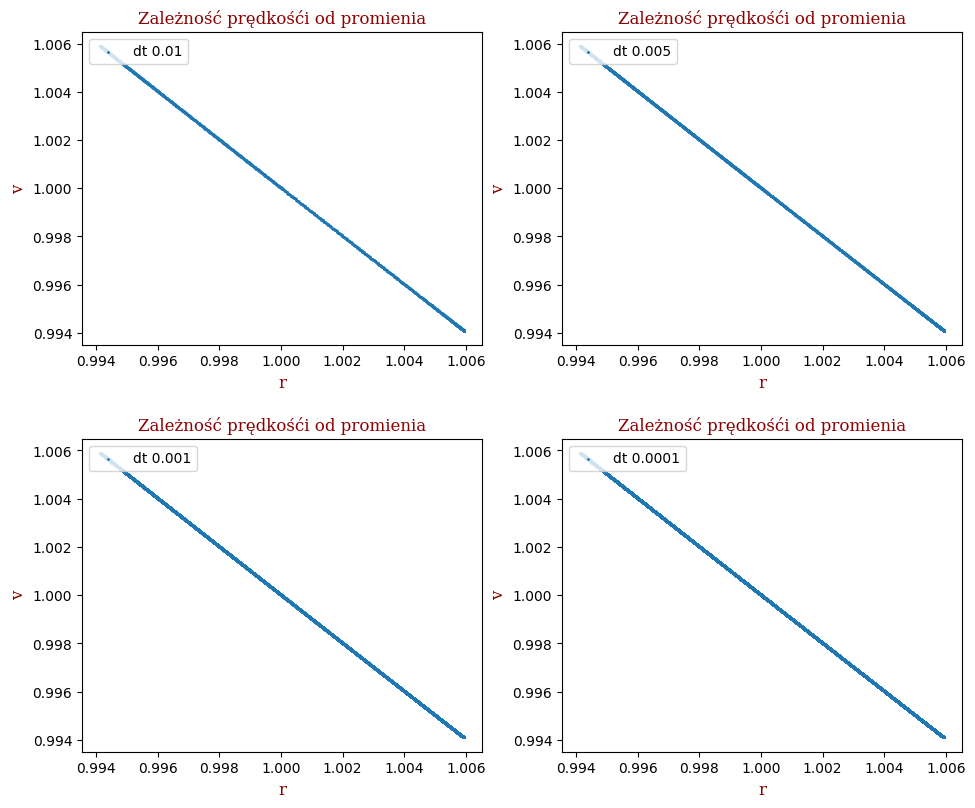

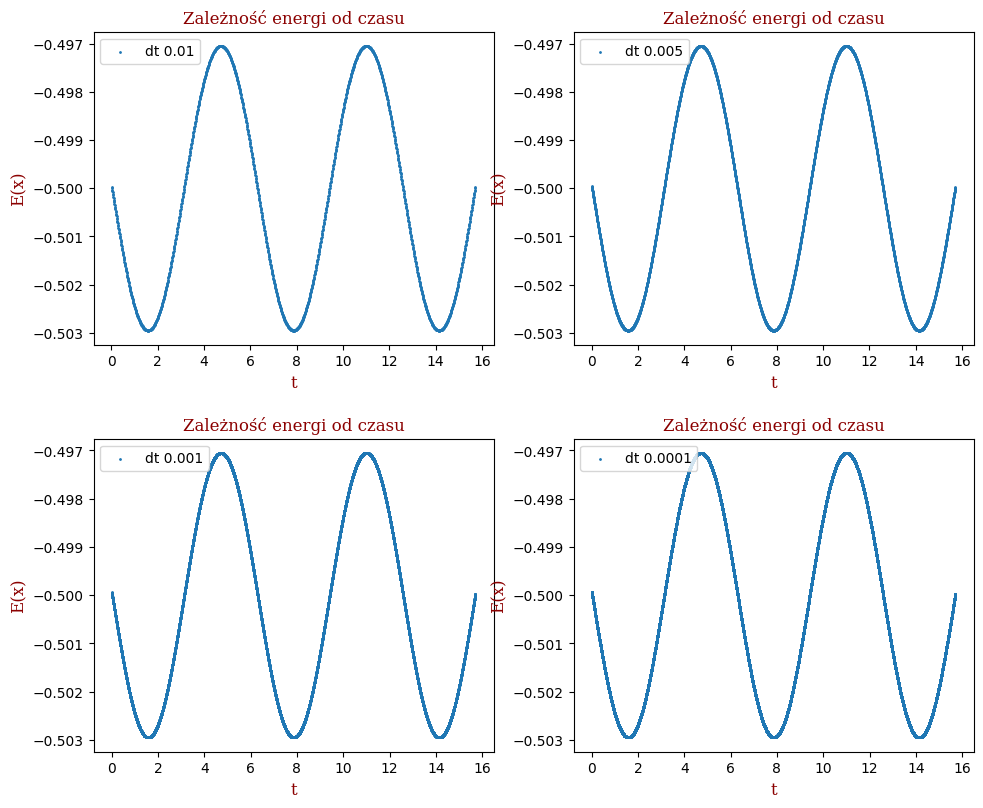

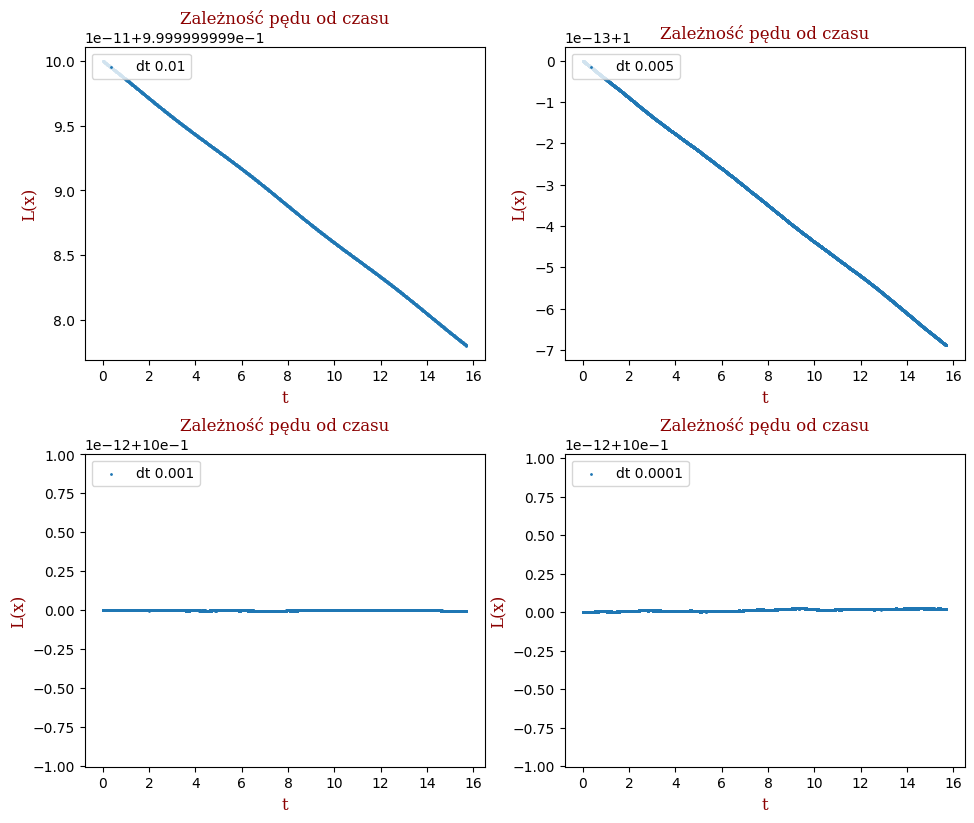

In [ ]:
def runge(u_0, dt, steps):
    def helper(u, wsp, k,dt):        
        return np.array([
            u[2] + wsp*k[2], 
            u[3] + wsp*k[3], 
            -(u[0] + wsp*k[0]) / ((u[0] + wsp*k[0])**2 + (u[1] + wsp*k[1])**2)**(3/2), 
            -(u[1] + wsp*k[1]) / ((u[0] + wsp*k[0])**2 + (u[1] + wsp*k[1])**2)**(3/2), 
        ])

    def calculate_step(u, dt):
        k1 = helper(u, 0, [1,1,1,1], dt)
        k2 = helper(u, dt*0.5, k1, dt)
        k3 = helper(u, dt*0.5, k2, dt)
        k4 = helper(u, dt*1, k3, dt)

        return np.multiply(dt, np.divide((k1 + 2*k2 + 2*k3 + k4), 6))
    
    t0, t1 = steps
    uvals = []
    tvals = []

    u = u_0
    
    while t0 < t1:
        u += calculate_step(u,dt)
        uvals.append(u.copy())
        t0 += dt
        tvals.append(t0)

    return np.array(uvals), tvals

results = {}

for i in range(4):
    u, t = runge(simulation[i+1][0], simulation[i+1][1], simulation_time)

    x, y, x_velocity, y_velocity = np.array_split(u, 4, axis=1)
    r = np.sqrt(x**2 + y**2)                       
    vel =  np.sqrt(x_velocity**2 + y_velocity**2) 
    energy = vel/2 - 1/r  
    momentum = x*y_velocity - y*x_velocity

    results[i] = {
        "x_position" : x, 
        "y_position" : y, 
        "x_velocity" : x_velocity,
        "y_velocity" : y_velocity, 
        "radius"     : r,
        "velocity"   : vel,
        "energy"     : energy, 
        "momentum"   : momentum,
        "time"       : t
    }

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

plotter_helper(results, "x_position", "y_position", "runge_plot_01", 1)
plotter_helper(results, "time", "x_position", "runge_plot_02", 2)
plotter_helper(results, "time", "y_position",  "runge_plot_03", 3)
plotter_helper(results, "radius", "velocity",  "runge_plot_04", 4)
plotter_helper(results, "time", "energy", "runge_plot_05", 5)
plotter_helper(results, "time", "momentum", "runge_plot_06", 6)

Wszystkie te metody różnią się swoimi charakterystykami. <br>
* Metoda jawna Eulera jest prosta i najmniej kosztowna - za to mało dokładna 
* Metoda niejawna jest kosztowna za to bardziej dokładna 
* Metoda półajwna wydaje się być ulepszeniem metody niejawnej - jest najdokładniejsza z wyżej wymienionych
* Metoda RK4 wydaje się być zbliżona kosztem obliczeniowym do metody jawnej Eulera przy dokładności zbliżonej do metody półjawnej

# Bibliografia
* Katarzyna Rycerz: Wykład z przedmiotu Metody Obliczeniowe w Nauce i Technice
* Materiały do zajęć 
* Julian Janus: Stabilność rozwiązań równań różniczkowych zwyczajnych - open.agh.edu.pl